In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

sys.path.append('../Preprocessing')
sys.path.append('../Model_Selection')


from Preprocessing import Train_And_Test, StandardScaler
from Model_Selection import KFolds, learning_curve, f1_score


iris = load_iris()


X_train, X_test, y_train, y_test  = Train_And_Test(iris.data, iris.target)

Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)


print(X_train.shape)
print(X_test.shape)


[[ 1.  2.  3.  1.  2.  3.  4.  6.  9.]
 [ 4.  5.  6. 16. 20. 24. 25. 30. 36.]
 [ 7.  8.  9. 49. 56. 63. 64. 72. 81.]]
(120, 4)
(30, 4)


In [2]:
from KNN import KNNClassifier
Clf = KNNClassifier(k = 10)
Clf.fit(X_train, y_train)
y_pred = Clf.predict(X_test)

Clf.score(X_test, y_pred)


{'Accuracy': 1.0, 'Recall': 1.0, 'Precision': 1.0, 'F1 Score': 1.0}

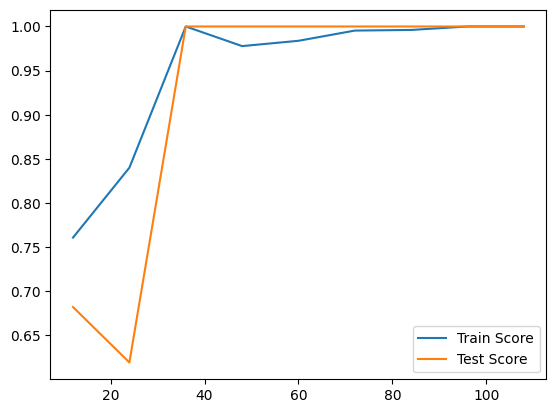

In [3]:
Size, Train_Score, Test_Score = learning_curve(X_train, y_train, Clf, train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  n_folds = 5, loss = f1_score)
plt.plot(Size, Train_Score, label = 'Train Score')
plt.plot(Size, Test_Score, label = 'Test Score')
plt.legend()